In [8]:
import glob 
import pandas as pd
import progressbar
import time
import rasterio
import xarray as xr

In [112]:

rid = 'RGI60-01.13635'
rid = 'RGI60-11.03380'
rid = 'RGI60-07.01568'
rid = 'RGI60-01.09637'
rid = 'RGI60-05.02563'
rid = 'RGI60-05.05000'
rid = 'RGI60-05.07787'
rgi_reg = rid[:8]

In [113]:
topo_file = './dems/surface_DEMs_{}/surface_DEM_{}.tif'.format(rgi_reg, rid)
c_file = './composite/{}/{}_thickness.tif'.format(rgi_reg, rid)

model = 'model_1'
model_file = c_file.replace('composite', model).replace('_thickness.tif', '.tif').replace(rid, 'thickness_' + rid)

In [114]:
ds = xr.open_rasterio(c_file)
ds.plot();

RasterioIOError: ./composite/RGI60-05/RGI60-05.07787_thickness.tif: No such file or directory

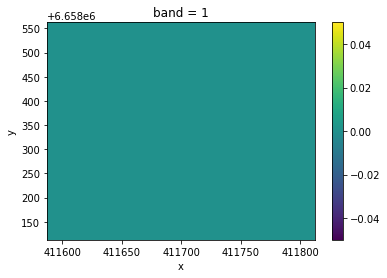

In [105]:
ds = xr.open_rasterio(model_file)
ds.plot();

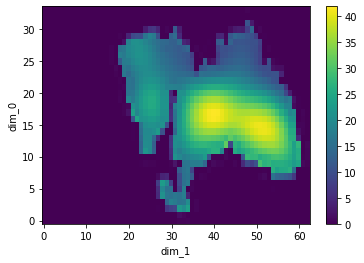

In [80]:
with rasterio.open(model_file) as ds:
    dx = ds.transform[0]
    data = ds.read().squeeze()

data[:, :3] = 0

da = xr.DataArray(data)
da.plot()

In [84]:
vol = 

In [93]:
df = pd.read_hdf('icevol_compiled.bck.hdf')
df.loc['RGI60-11.03380', 'model_3_vol_m3'] = data.sum() * dx**2
df.loc['RGI60-11.03380', 'model_3_vol_bsl_m3'] = 0

In [94]:
df.to_csv('icevol_compiled.csv')
df.to_hdf('icevol_compiled.hdf', key='df')

In [73]:
data.shape

(1, 34, 63)

In [71]:
data.argmax()

126

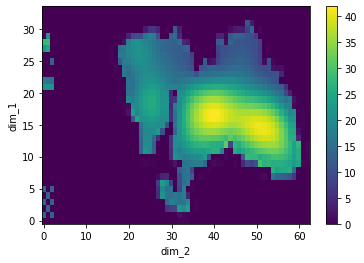

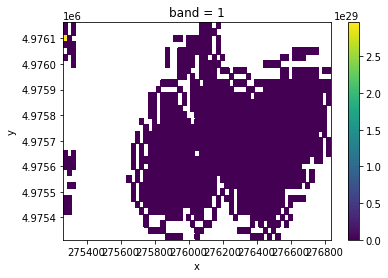

In [42]:
ds.where(ds > 0).plot();

In [37]:
2.96263385e+29 > 2e29

True